In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []
  for i in range(len(X1)):
    if X1[i] + X2[i] >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)


  return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = []
    for i in range(len(X1)):
      if X1[i] + X2[i] >= T:
        state_neuron.append(1)
      else:
        state_neuron.append(0)

    return state_neuron


In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


##### Answer the following Questions

1. List out all the limitations of MCP - Neurons.

=>
Some of the limitations of MCP Neurons are,

i. MCP neurons can only solve linearly separable functions.

ii. The weight and thereshold are fixed and hence it cant learn from data.

iii. It cannot handle continuous data.

iv. Complex multi class problems is not supported.
<br><br>



2. Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

=>
If to devise a logic for XOR function with if else rules, then the logic would be,<br>
0 if x1 == x2 else 1

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/Sem6/AI_ML/Week_3/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


1. What does the shape of X represent?

=> The shape of X represents the total number of images in dataset with 784 pixels in each image.


2. What does the shape of Y represent?

=> The shape Y represents the label column for each image representing either 0 or 1.

### Viewing the Dataset.

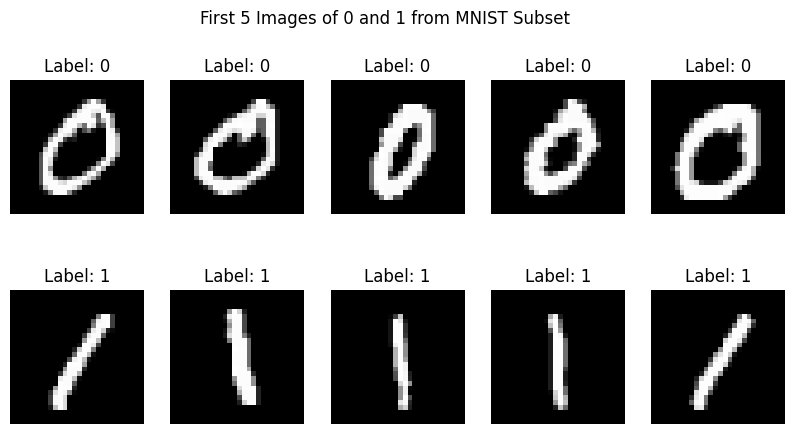

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

1. What does the weights array represent in this context?

=> The weights array represents the learnable parameters of the model, assigned to each input feature.


2. Why are we initializing the weights to zero? What effect could this
have on the training process?

=> Initializing the weights to zero makes the similar starting point for training data so that there is no preference to any particular feature.

The effect on training process would be on deep learning since each neurons needs multiple weights and initializing 0 makes all the neurons to get same gradient updates, hence it is in effective for deep learnings.

## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#

    n_samples, n_features = X.shape

    for epoch in range(epochs):
      correct_predictions = 0
      for i in range(n_samples):
        output = np.dot(X[i], weights) + bias
        y_pred = 1 if output >= 0 else 0
        if y_pred == y[i]:
          correct_predictions += 1
        else:
          update = learning_rate * (y[i] - y_pred)
          weights += update * X[i]  # Update weights
          bias += update

      accuracy = correct_predictions / n_samples
      print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.4f}")




    return weights, bias, accuracy

1. What is the purpose of the output = np.dot(X[i], weights) + bias line?

=> The purpose is that it computes the weighted sum of input features (X[i]) with the corresponding weights, then adds the bias.

<br>
2. What happens when the prediction is wrong? How are the weights and
bias updated?

=> If the prediction is incorrect then the weights and bias are updated, it corrects the weights in the direction of true label to improve the classification in further iterations.

<br>

3. Why is the final accuracy important, and what do you expect it to be?

=> Accuracy measures how well the perceptron has learned the decision boundary, for the linear separable data final accuracy should reach 100%.

## Training the Perceptron

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 0.9967
Epoch 2/100 - Accuracy: 0.9982
Epoch 3/100 - Accuracy: 0.9987
Epoch 4/100 - Accuracy: 0.9987
Epoch 5/100 - Accuracy: 0.9990
Epoch 6/100 - Accuracy: 0.9993
Epoch 7/100 - Accuracy: 0.9998
Epoch 8/100 - Accuracy: 0.9995
Epoch 9/100 - Accuracy: 0.9989
Epoch 10/100 - Accuracy: 0.9992
Epoch 11/100 - Accuracy: 0.9995
Epoch 12/100 - Accuracy: 0.9998
Epoch 13/100 - Accuracy: 1.0000
Epoch 14/100 - Accuracy: 1.0000
Epoch 15/100 - Accuracy: 1.0000
Epoch 16/100 - Accuracy: 1.0000
Epoch 17/100 - Accuracy: 1.0000
Epoch 18/100 - Accuracy: 1.0000
Epoch 19/100 - Accuracy: 1.0000
Epoch 20/100 - Accuracy: 1.0000
Epoch 21/100 - Accuracy: 1.0000
Epoch 22/100 - Accuracy: 1.0000
Epoch 23/100 - Accuracy: 1.0000
Epoch 24/100 - Accuracy: 1.0000
Epoch 25/100 - Accuracy: 1.0000
Epoch 26/100 - Accuracy: 1.0000
Epoch 27/100 - Accuracy: 1.0000
Epoch 28/100 - Accuracy: 1.0000
Epoch 29/100 - Accuracy: 1.0000
Epoch 30/100 - Accuracy: 1.0000
Epoch 31/100 - Accuracy: 1.0000
Epoch 32/100 - Ac

## Step 5: Visualize Misclassified Images

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


1. What does misclassified idx store, and how is it used in this code?

=> The misclassified idx stores the indices of misclassified data points, If there are misclassified images, the code plots the first 10 misclassified images else if its empty, it means all images are classified correctly.

2.  How do you interpret the result if the output is ”All images were
correctly classified!”?

=>
If misclassified idx store is empty then all prediction were correct then the output is All images were correctly classified.

## Perception Algorithm for 3 vs 5 Classification

In [ ]:
# Load the dataset
df_3_5 = pd.read_csv("/content/drive/MyDrive/Sem6/AI_ML/Week_3/mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixels
y = df_3_5["label"].values  # Labels (3 or 5)


# Normalize pixel values to range [0,1] for better convergence
X = X / 255.0


# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


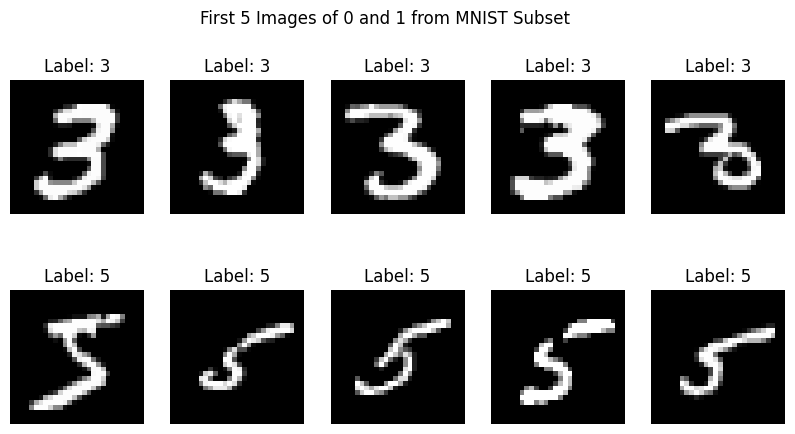

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 3]  # Get all images with label 0
images_1 = X[y == 5]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

In [ ]:
def train_perceptron(X, y, learning_rate=0.1, epochs=100):
    """
    Train a perceptron for binary classification.

    Parameters:
    - X: Feature matrix (n_samples, n_features)
    - y: Binary labels (n_samples,)
    - learning_rate: Step size for weight updates
    - epochs: Number of iterations

    Returns:
    - weights: Trained weight vector
    - bias: Trained bias value
    - accuracy: Final training accuracy
    """
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    n_samples, n_features = X.shape

    for epoch in range(epochs):
      for i in range(n_samples):
        output = np.dot(weights, X[i]) + bias
        y_pred = 5 if output >= 0 else 3

        if y_pred != y[i]:
          update = learning_rate * (y[i] - y_pred)
          weights += update * X[i]  # Update weights
          bias += update

      # Final pred
      predictions = np.dot(X[0], weights) + bias
      y_pred = np.where(predictions >= 0, 5, 3)

      accuracy = np.mean(y_pred == y)
      print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.4f}")


    return weights, bias, accuracy

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 0.4586
Epoch 2/100 - Accuracy: 0.4586
Epoch 3/100 - Accuracy: 0.4586
Epoch 4/100 - Accuracy: 0.4586
Epoch 5/100 - Accuracy: 0.4586
Epoch 6/100 - Accuracy: 0.4586
Epoch 7/100 - Accuracy: 0.4586
Epoch 8/100 - Accuracy: 0.4586
Epoch 9/100 - Accuracy: 0.4586
Epoch 10/100 - Accuracy: 0.4586
Epoch 11/100 - Accuracy: 0.4586
Epoch 12/100 - Accuracy: 0.4586
Epoch 13/100 - Accuracy: 0.4586
Epoch 14/100 - Accuracy: 0.4586
Epoch 15/100 - Accuracy: 0.4586
Epoch 16/100 - Accuracy: 0.4586
Epoch 17/100 - Accuracy: 0.5414
Epoch 18/100 - Accuracy: 0.4586
Epoch 19/100 - Accuracy: 0.4586
Epoch 20/100 - Accuracy: 0.4586
Epoch 21/100 - Accuracy: 0.4586
Epoch 22/100 - Accuracy: 0.5414
Epoch 23/100 - Accuracy: 0.4586
Epoch 24/100 - Accuracy: 0.4586
Epoch 25/100 - Accuracy: 0.4586
Epoch 26/100 - Accuracy: 0.4586
Epoch 27/100 - Accuracy: 0.4586
Epoch 28/100 - Accuracy: 0.4586
Epoch 29/100 - Accuracy: 0.4586
Epoch 30/100 - Accuracy: 0.4586
Epoch 31/100 - Accuracy: 0.4586
Epoch 32/100 - Ac

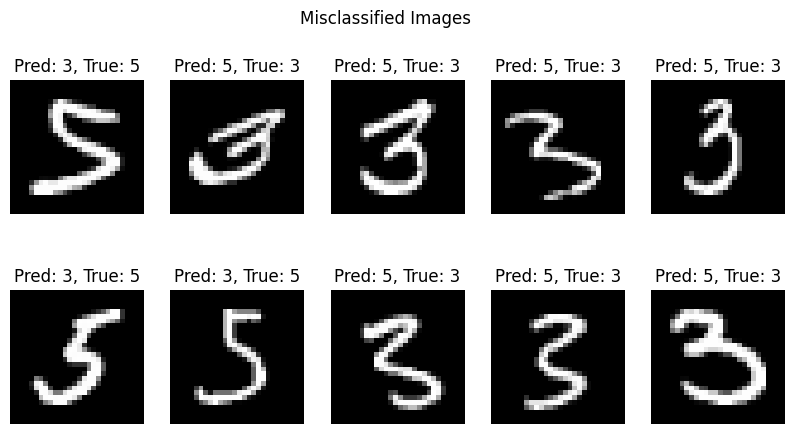

In [ ]:
# Get final predictions
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 5, 3)

# Identify misclassified samples
misclassified_idx = np.where(y_pred != y)[0]

# Visualize misclassified images
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show first 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

The accuracy was very low less than 50% and the model needs to be designed with more analysis and understanding. Many of the classification are wrong. Since the pattern of digits 3 and 5 in images requires more strong and well designed model.

#### End of Worksheet 03